In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import poisson

from matplotlib import rcParams

rcParams['figure.figsize'] = (10,5)

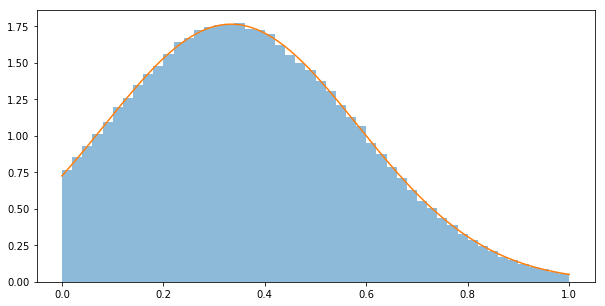

In [2]:
def trucated_normal(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))

def normal_MH(T, mu, sigma, burn_in=1000):
    state_seq = np.random.rand(T)
    coin_flip = np.random.rand(T)
        
    for t in xrange(T-1):
        if coin_flip[t] >= trucated_normal(state_seq[t+1], mu, sigma) / trucated_normal(state_seq[t], mu, sigma):
            state_seq[t+1] = state_seq[t]
            
    return state_seq[burn_in:]

mu = 1/3
sigma = 1/4

samples = normal_MH(10**6, mu, sigma)
plt.hist(samples, bins=50, alpha=.5, normed=True)

f = trucated_normal(np.linspace(0,1,1000), mu, sigma)
aof = quad(trucated_normal, 0, 1, args=(mu, sigma))[0]

plt.plot(np.linspace(0,1,1000), f/aof, mu, sigma)
plt.show()

In [3]:
def poisson_MH(T, lmbda, burn_in=1000):
    samples = np.empty(T, dtype=np.int16)
    proposed_step = np.random.choice([1,-1], size=T)
    decision = np.random.rand(T)
    
    samples[0] = np.random.randint(1,10)
    poisson_pmf = poisson(lmbda).pmf(np.arange(100))
    for t in xrange(T-1):
        proposal = max(samples[t] + proposed_step[t], 1)
        
        if decision[t] >= min(poisson_pmf[proposal]/poisson_pmf[samples[t]], 1):
            samples[t+1] = samples[t]
                
        else:
            samples[t+1] = proposal
        
    return samples[burn_in:]

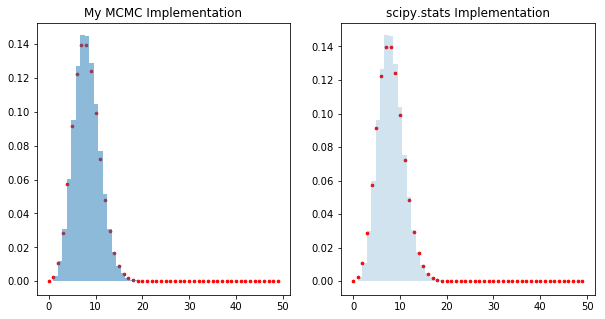

In [8]:
lmbda = 8
samples = poisson_MH(10**6, lmbda, burn_in=10**3)

plt.subplot(121)
plt.hist(samples, bins=np.unique(samples).size, alpha=.5, normed=True)
plt.scatter(np.arange(50), poisson(lmbda).pmf(np.arange(50)), c='red', s=7)
plt.title("My MCMC Implementation")

truth = poisson(lmbda).rvs(10**6)
plt.subplot(122)
plt.hist(truth, bins=np.unique(truth).size, alpha=.2, normed=True)
plt.scatter(np.arange(50), poisson(lmbda).pmf(np.arange(50)), c='red', s=7)
plt.title("scipy.stats Implementation")
plt.show()